In [90]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Heart Disease UCI

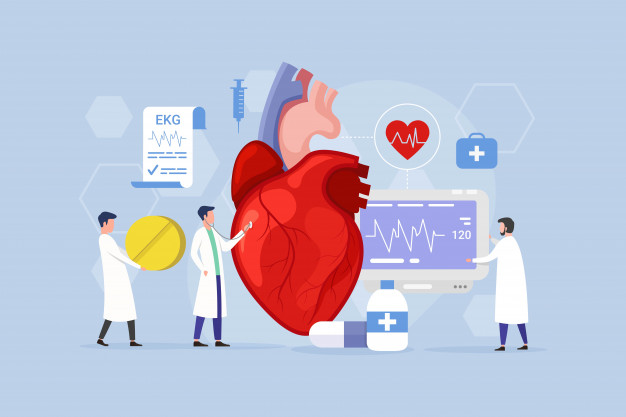

In [108]:
from IPython.core.display import Image, display
display(Image('https://image.freepik.com/vector-gratis/concepto-diseno-tratamiento-enfermedades-corazon-personas-pequenas_7087-969.jpg', width=600))

## Imports

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

# Preprocess and visualization techniques to understand the data

In this notebook, we'll explored the heart disease dataset. In this notebook, we have implemented many of the strategies to understand data. The feature variable of interest is **target** variable. We have analyzed it alone and check its interaction with other variables. We have also discussed how to detect missing data and outliers.

We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model which tries predict if a patient has this disease or not.
You can find the dataset on https://archive.ics.uci.edu/ml/datasets/Heart+Disease

### Dataset Attributes

- **age**: age in years
- **sex**:
    - 0: female
    - 1: male
- **chest_pain_type**: chest pain type
    - 1: typical angina
    - 2: atypical angina
    - 3: non-anginal pain
    - 4: asymptomatic
- **resting_blood_pressure**: resting blood pressure (in mm Hg on admission to the hospital)
- **cholesterol**: serum cholestoral in mg/dl
- **fasting_blood_sugar**: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
- **rest_ecg**: resting electrocardiographic results
    - 0: normal
    - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- **max_heart_rate_achieved**: maximum heart rate achieved
- **exercise_induced_angina**: exercise induced angina (1 = yes; 0 = no)
- **st_depression**: ST depression induced by exercise relative to rest
- **st_slope**: the slope of the peak exercise ST segment
    - 1: upsloping
    - 2: flat
    - 3: downsloping
- **num_major_vessels**: number of major vessels (0-3) colored by flourosopy
- **thalassemia**: 
    - 3 = normal; 
    - 6 = fixed defect; 
    - 7 = reversable defect
- **target**: diagnosis of heart disease (angiographic disease status)
     - 0: < 50% diameter narrowing
     - 1: > 50% diameter narrowing


## Load Seaborn functions

In [5]:
def relation_plot(attribute):
    plt.rcParams['figure.figsize'] = (12, 9)
    sns.violinplot(x=df["target"], y=df[attribute], data=df, palette="muted")
    plt.title(f'Relation of target with {attribute}', fontsize = 20, fontweight = 30)
    plt.show()

## Load data from CSV

At first, we have to import data from CSV dataset.

In [5]:
DATASET_FILEPATH = "../../dataset/uci_dataset.csv"

column_names = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

df = pd.read_csv(DATASET_FILEPATH)
df.columns = column_names
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploratory data analysis

Let's take a first look at the distribution of the data. We can explorer the Pandas Profiling report. 

Pandas profiling is an open source Python module with which we can quickly do an exploratory data analysis with just a few lines of code. Besides, if this is not enough to convince us to use this tool, it also generates interactive reports in web format that can be presented to any person, even if they don’t know programming.
In short, what pandas profiling does is save us all the work of visualizing and understanding the distribution of each variable. It generates a report with all the information easily available.

In [44]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [46]:
profile.to_file("heart-disease.html")

An overview of the dataset is displayed in the first section of the report. Subsequently, details of each of the characteristics are shown including the number of unique values, the number of nulls and statistics such as maximum, minimum and average values. In addition you can also find sections with correlation data and samples of the data.

One of the strong points of the generated report are the warnings that appear at the beginning. It tells us the variables that contain NaN values, variables with many zeros, categorical variables with high cardinality, etc.

## Data Visualization

### Visualization of Target variable

We can explore the `target` variable to know more about the problem. We can see two possible values for `target`: 0 or 1. 

In [6]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


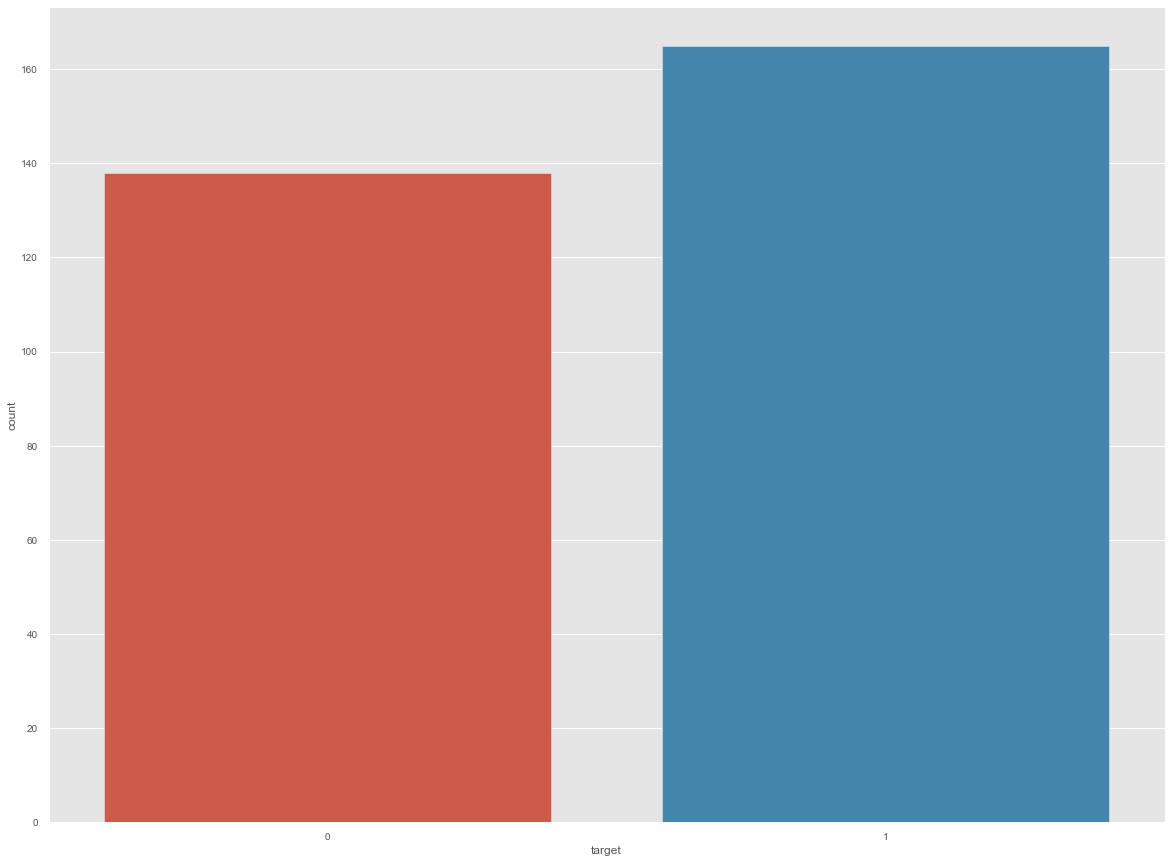

In [7]:
sns.countplot(x="target", data=df)

countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Let's look at the Target. The dataset is quite balanced with almost equal no. of Positive and Negative Classes. Let's say the Positive Class says that the patient is suffering from the disease and the Negative class says that the patient is not suffering from the disease.

Now, we can compare target with other attributes.

### Comparison Target with other dataset attributes

We can compare the `target` with `fasting_blood_sugar`, `exercise_induced_angina` and `rest_ecg`.

### Relation Target with fasting_blood_sugar

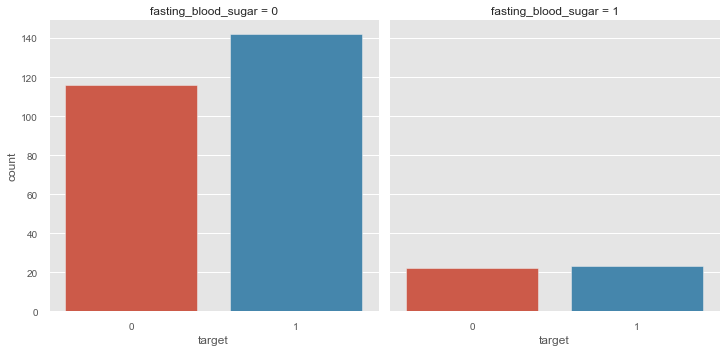

In [9]:
sns.catplot(x="target", col="fasting_blood_sugar", kind="count", data=df)

### Relation Target with exercise_induced_angina

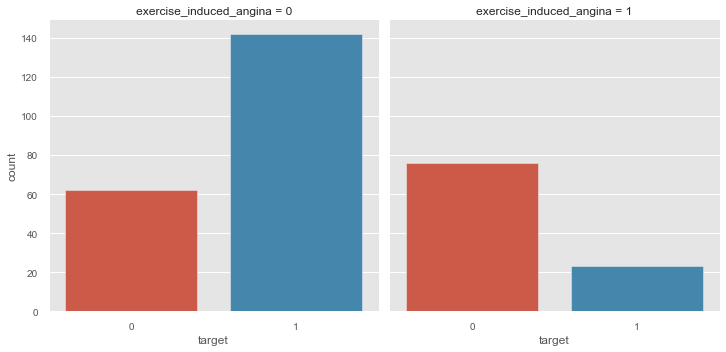

In [10]:
sns.catplot(x="target", col="exercise_induced_angina", kind="count", data=df)

### Relation Target with resting electrocardiographic results

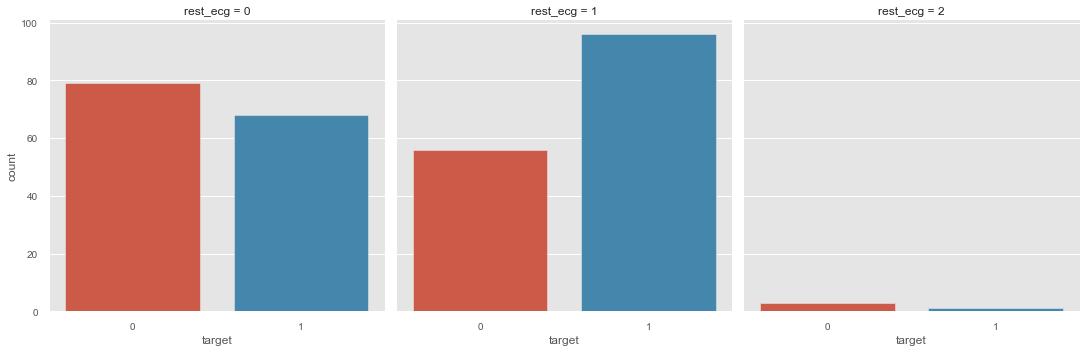

In [11]:
sns.catplot(x="target", col="rest_ecg", kind="count", data=df)

### Relation Target with Age

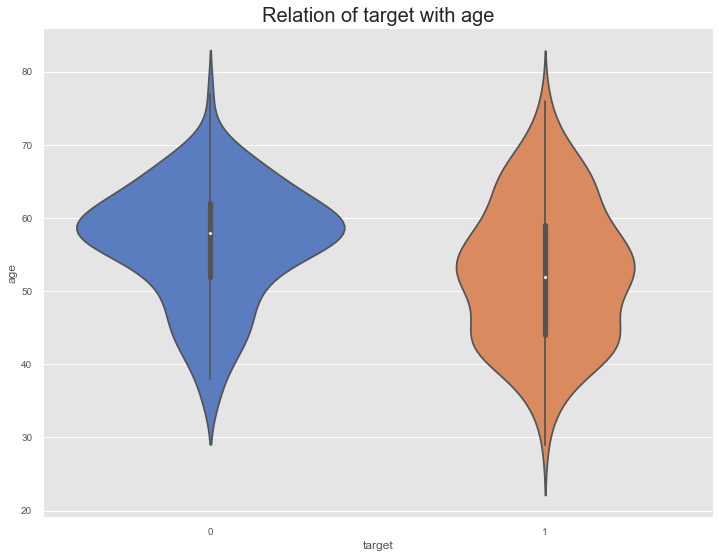

In [12]:
relation_plot("age")

From the above bivariate plot between the target and the age of the patients, we are not able to find any clue or pattern, so age is not a very good attribute to determine the heart disease of a patient as a patient of heart diseases range from 30-70, whereas it is not important that all of the people lying in that same age group are bound to suffer from the heart diseases.

### Relation Target with Cholesterol

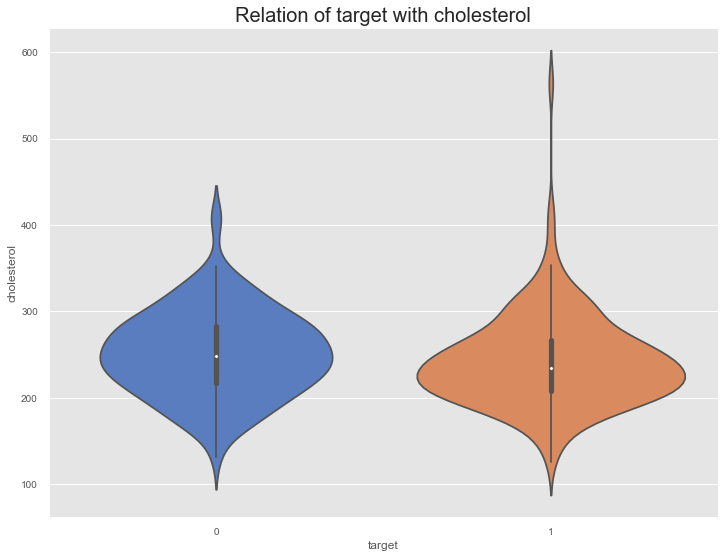

In [13]:
relation_plot("cholesterol")

The above bivariate plot between cholestrol levels and target suggests that the patients likely to suffer from heart diseases are having higher cholestrol levels in comparison to the patients with target 0 (likely to not suffer from the heart diseases)

Hence, we can infer from the plot that the cholestrol levels plays an important role in determining heart diseases. We all must keep our cholestrol levels in control as possible.

### Relation Target with Peak Exercise

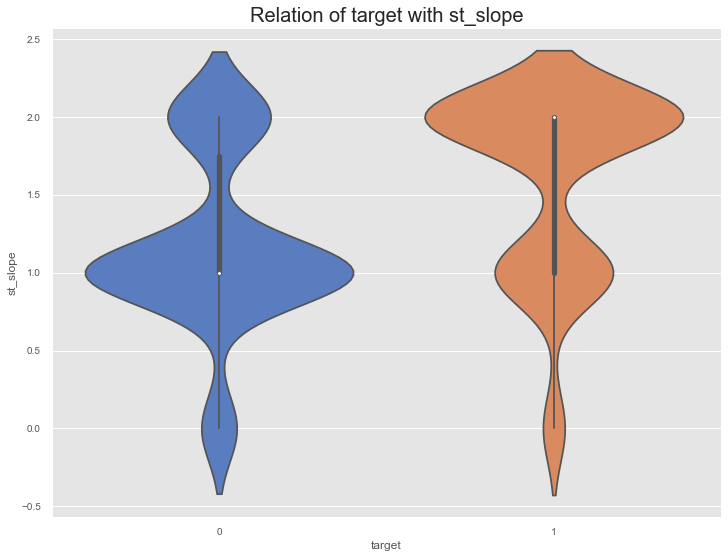

In [14]:
relation_plot("st_slope")

Slope: 0 refers to upsloping, 1 refers to flat exercises pattern.

This plot clearly shows that the patients who are not likely to suffer from any heart diseases are mostly having value 1 means upsloping, whereas very few people suffering from heart diseases have upsloping pattern in exercises. Also, Flat Exercises are mostly seen in the cases of Patients who are more likely to suffer from heart diseases.

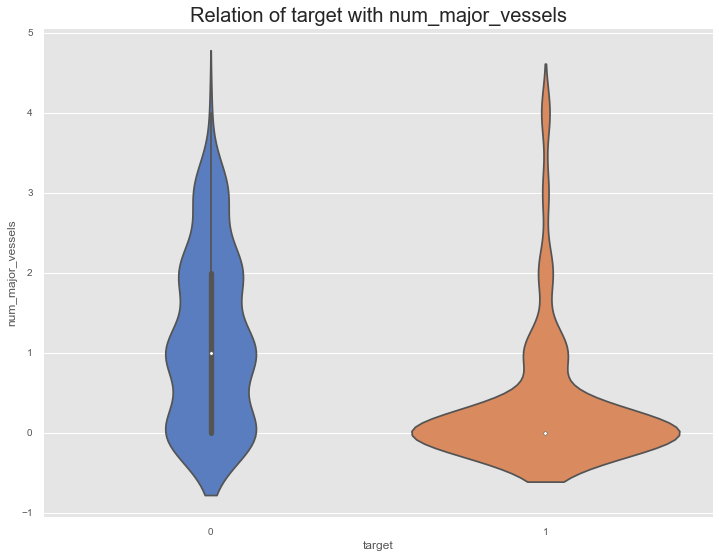

In [15]:
relation_plot("num_major_vessels")

The above bivariate plot between Target and Number of Major Vessels, shows that the patients who are more likely to suffer from Heart diseases are having high values of major Vessels wheras the patients who are very less likely to suffer from any kind of heart diseases have very low values of Major Vessels.

It is also helpful in determining the heart diseases, the more the number of vessels, the more is the chance of suffering from heart diseases.

## Calculate frequency of some attributes of the dataset 

### Visualization of age frequency

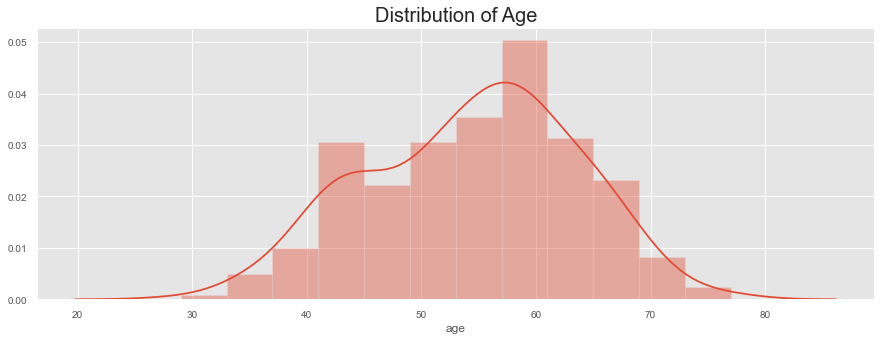

In [16]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(df['age'])
plt.title('Distribution of Age', fontsize = 20)
plt.show()

The before cell, shows the distribution of Age amongst all of the entries in the dataset about the heart patients. The Graph suggests that the highest number of people suffering from heart diseases are in the age group of 55-65 years. The patients in the age group 20-30 are very less likely to suffer from heart diseases.

As we know that the number of people in the age group 65-80 has a very low population, hence distribution is also less. we might have to opt for other plots to investigate further and get some more intuitive results.

### Visualization of sex frequency

Count percent of male and female people

In [17]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


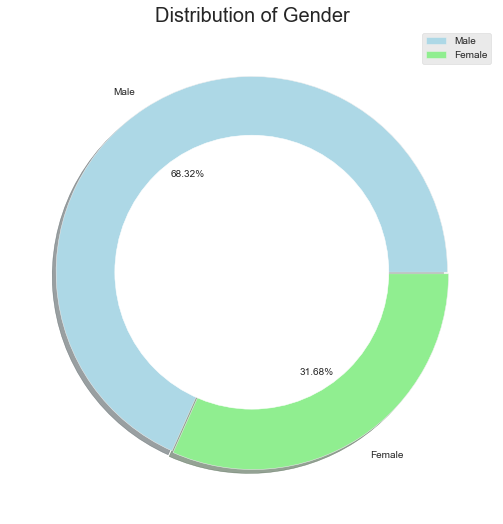

In [18]:
size = df['sex'].value_counts()
colors = ['lightblue', 'lightgreen']
labels = "Male", "Female"
explode = [0, 0.01]

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('Distribution of Gender', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

This pie chart, whhich shows us the distribution of gender in the heart diseases. By looking at the plot, we can assume that Males are two times more likely to suffer from heart diseases in comparison to females.

According to our study,from all the entries in our dataset 68% of the patients are men whereas only 32% are women. More number of men took participation in heart disease check ups.

### Visualization of Heart Disease Frequency for Ages

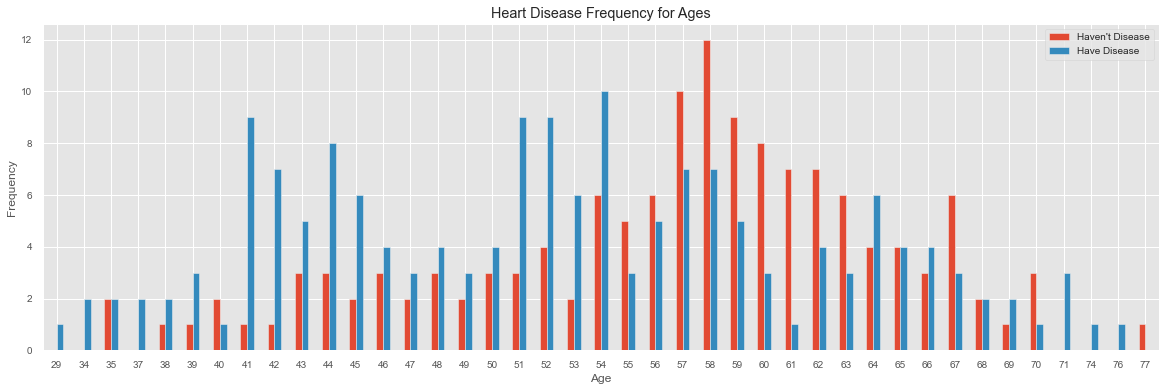

In [19]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

### Visualization of Heart Disease Frequency for Sex

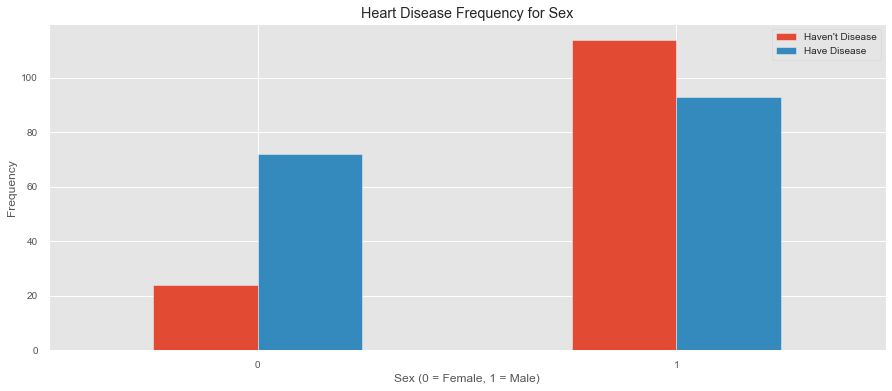

In [20]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

The data shows more females with heart disease than without it. Otherwise, there are more males without heart disease.

### Visualization of Disease or not Disease between Maximun Heart rate and Age

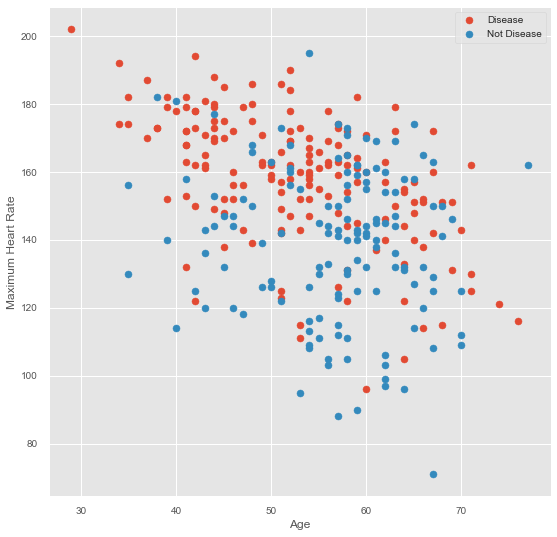

In [21]:
plt.scatter(x=df.age[df.target==1], y=df.max_heart_rate_achieved[(df.target==1)])
plt.scatter(x=df.age[df.target==0], y=df.max_heart_rate_achieved[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

The before cell, shows the a swarm plot of maximun heart rate and age amongst all of the entries in the dataset about the heart patients. The graph suggests that the highest number of people suffering from heart diseases have a high heart rate. This plot show us that heart diseases in the majority of the cases are indepently of the age values. The patients in the age group 20-30 are very less likely to suffer from heart diseases.

### Visualization of Heart Disease Frequency for Slope

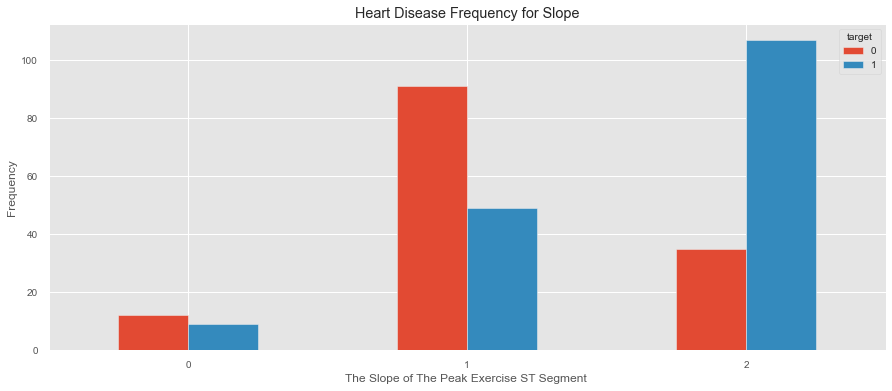

In [22]:
pd.crosstab(df.st_slope,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

st_slope: the slope of the peak exercise ST segment
1: upsloping
2: flat
3: downsloping

This bar chart, which shows us the distribution of Peak of exercise in the heart diseases. By looking at the plot, we can assume that people with a peak type 3 (Downslopping) have more possibilities to suffer heart diseases in comparison to people who have 1 (upsloping) or 2 (flat). We can assume that, when people have a physical exercise routines have less possibilities to suffer heart disease  

### Visualization of Heart Disease Frequency According To FBS

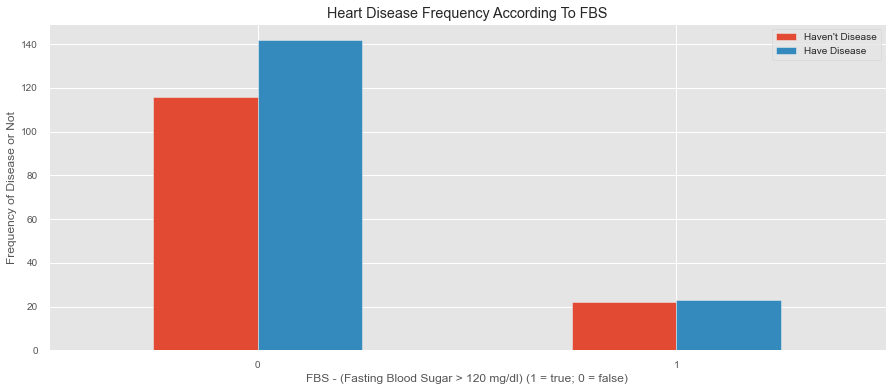

In [23]:
pd.crosstab(df.fasting_blood_sugar,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

This bar chart, which shows us the distribution of Fasting Blood Sugar in the heart diseases. By looking at the plot, we can assume that people with FBS > 120 have less possibilities to suffer heart diseases in comparison to people who have FBS<120.

### Visualization of Heart Disease Frequency According To Chest Pain Type

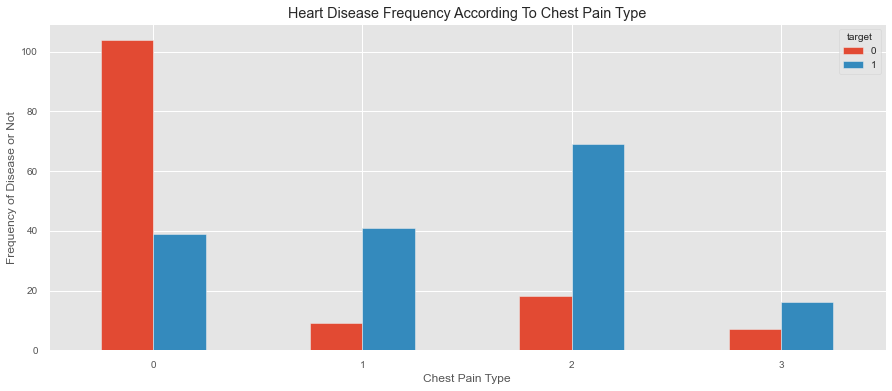

In [24]:
pd.crosstab(df.chest_pain_type,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

## Outliers

We will make boxplots to visualise outliers in the continuous numerical variables : -

age, trestbps, chol, thalach and oldpeak variables.

### Age

In [32]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

### Box-plot of age variable

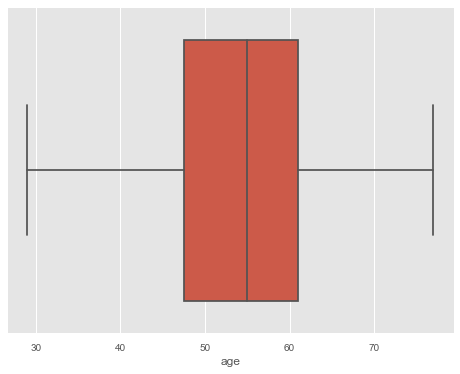

In [33]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["age"])
plt.show()

### Resting_blood_pressure

In [35]:
df['resting_blood_pressure'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: resting_blood_pressure, dtype: float64

### Box-plot of resting_blood_pressure variable

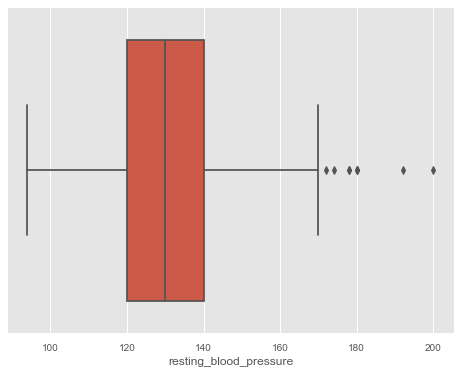

In [36]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["resting_blood_pressure"])
plt.show()

### Cholesterol

In [37]:
df['cholesterol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: cholesterol, dtype: float64

### Box-plot of cholesterol variable

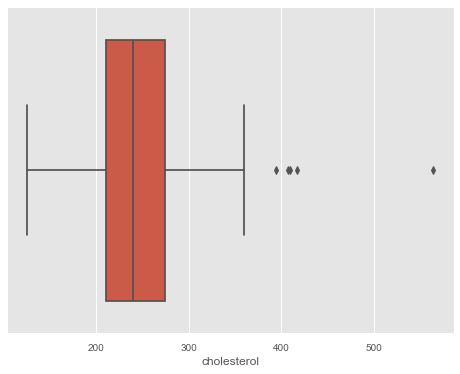

In [38]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["cholesterol"])
plt.show()

### Max heart rate achieved

In [39]:
df['max_heart_rate_achieved'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: max_heart_rate_achieved, dtype: float64

### Box-plot of max_heart_rate_achieved variable

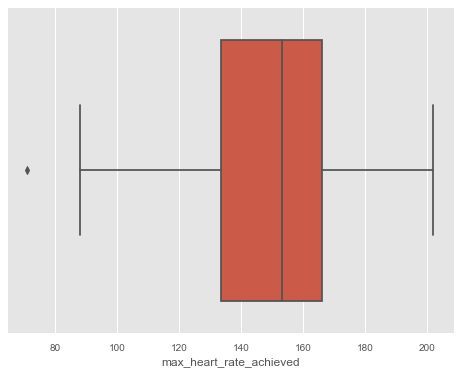

In [41]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["max_heart_rate_achieved"])
plt.show()

### St depression -> ST depression induced by exercise relative to rest

In [42]:
df['st_depression'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: st_depression, dtype: float64

### Box-plot of st_depression variable

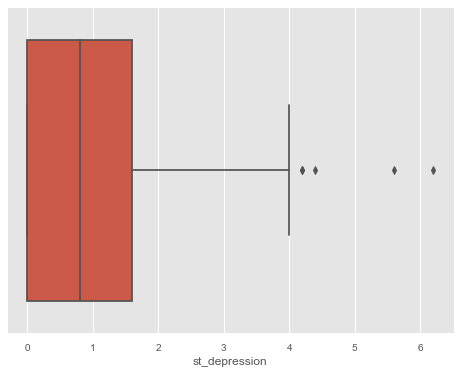

In [43]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["st_depression"])
plt.show()

### Outliers founds:

The **age** variable does not contain any outlier.

The **resting_blood_pressure** variable contains outliers to the right side.

The **cholesterol** variable also contains outliers to the right side.

The **max_heart_rate_achieved** variable contains a single outlier to the left side.

The **oldpeak** variable contains outliers to the right side.


NOTE: Those variables containing outliers needs further investigation.

## Preprocess data

As a dataset extracted from the Kaggle portal, the dataset is already in a position to carry out training from the start. Among these conditions we find that the format of the values is correct, the existing columns are the necessary ones since the vast majority have a fairly high correlation index among all with the target. There are no columns where you can see null or empty data, and there is no need to generate aggregation columns. The dataset has no missing values for categorical variables also.

## Feature Importance and variables correlation

In [2]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest, SelectPercentile

### Correlation Matrix

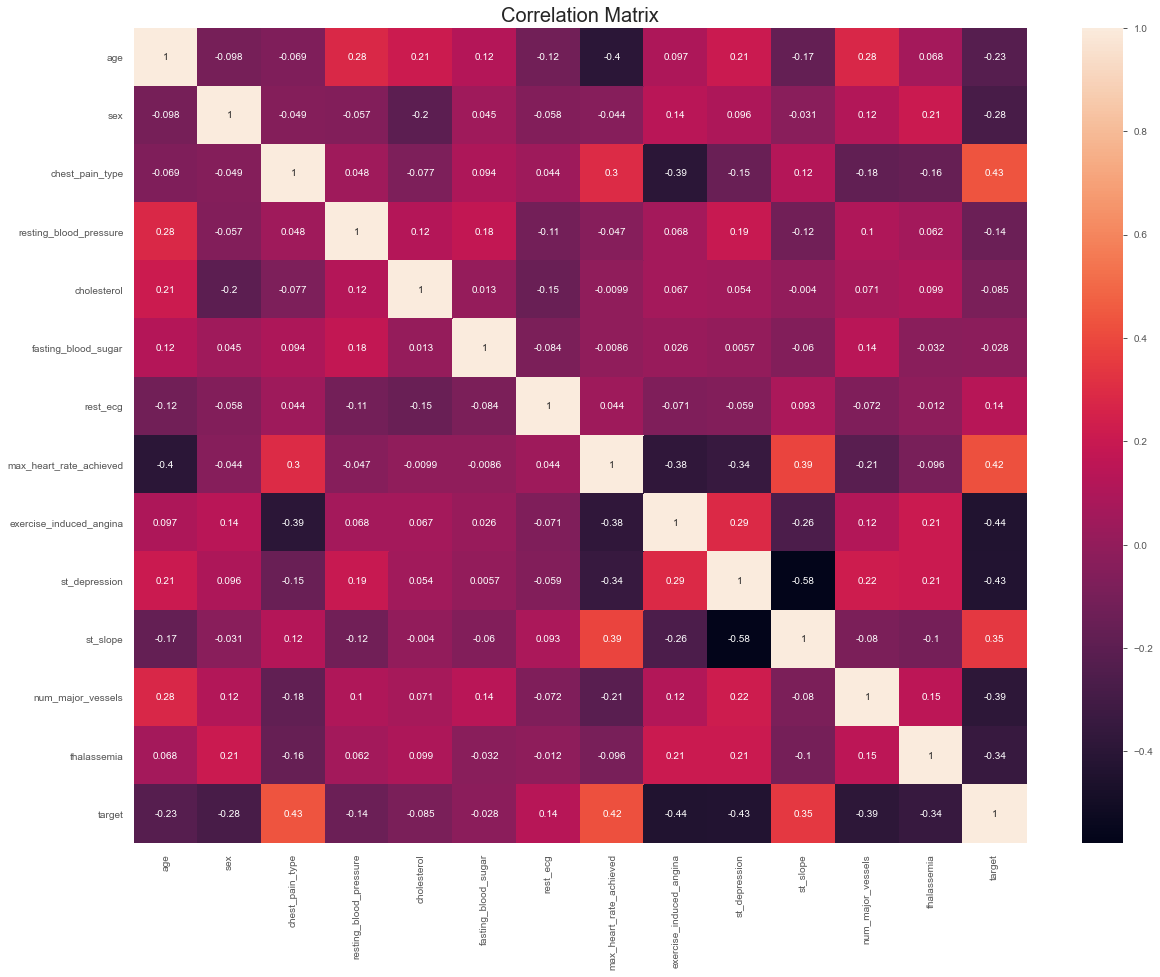

In [5]:
plt.rcParams['figure.figsize'] = (20, 15)
plt.style.use('ggplot')

sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix', fontsize = 20)
plt.show()

The above correlation matrix is to show the correlations amongst the different attributes of the given dataset. The cell before shows that almost all of the features/attributes given in the dataset are very less correlated with each other. This implies we must include all of the features, as we can only eliminate those features where the correlation of two or more features are very high.

### Feature Importance: Filter Methods(Statistical & Ranking Methods)

### Mutual Information using Classification

In [14]:
X = df.drop(['target'], axis=1)
X.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [15]:
y = df['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((212, 13), (212,), (91, 13), (91,))

In [17]:
mutual_info = mutual_info_classif(X_train.fillna(0), y_train)
mutual_info

array([0.        , 0.        , 0.16806135, 0.05142402, 0.06146455,
       0.        , 0.02130807, 0.06098482, 0.06478686, 0.0820996 ,
       0.05967992, 0.10245194, 0.11769823])

In [18]:
mi_series = pd.Series(mutual_info)
mi_series.index = X_train.columns
mi_series.sort_values(ascending=False)

chest_pain_type            0.168061
thalassemia                0.117698
num_major_vessels          0.102452
st_depression              0.082100
exercise_induced_angina    0.064787
cholesterol                0.061465
max_heart_rate_achieved    0.060985
st_slope                   0.059680
resting_blood_pressure     0.051424
rest_ecg                   0.021308
fasting_blood_sugar        0.000000
sex                        0.000000
age                        0.000000
dtype: float64

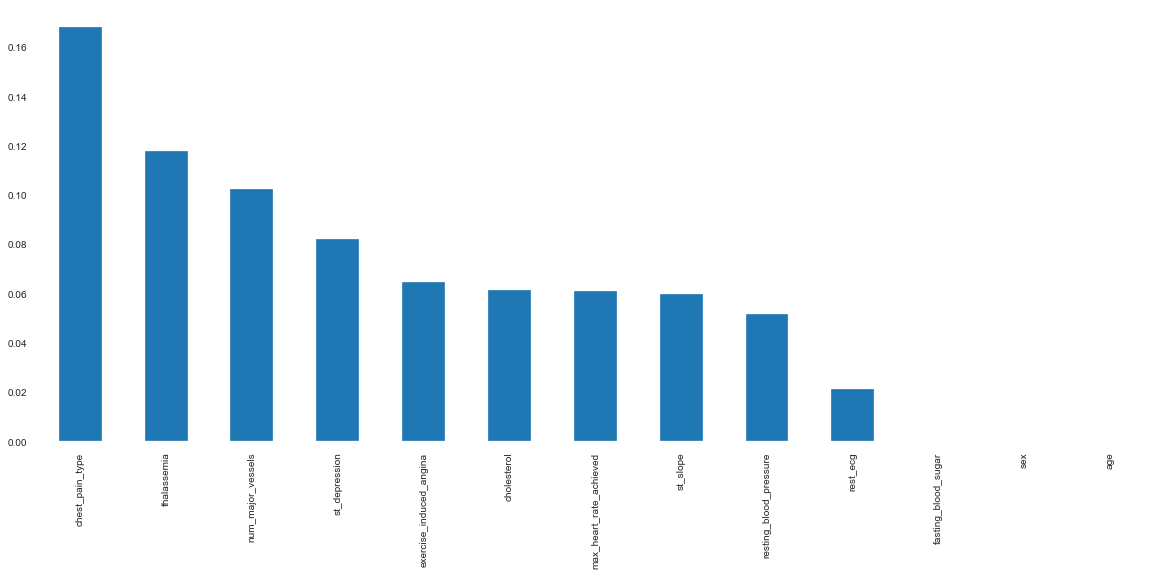

In [19]:
mi_series.sort_values(ascending=False).plot.bar(figsize=(20,8))

As we can see in the plot above from left to right, the features which have the most amount of mutual information is on the left and the features with the least amount of mutual information are on the right. Some of the features contribute a lot to the mutual information whereas some of them do not contribute anything. So, to select the important features from this list, we can set a threshold like maybe select the first 10 percentile of features or first 20 features etc.

To do this we can use a combination of "SelectKbest" or "SelectPercentile".

In [20]:
k_best_features = SelectKBest(mutual_info_classif, k=10).fit(X_train.fillna(0), y_train)
print('Selected top 10 features: {}'.format(X_train.columns[k_best_features.get_support()]))

Selected top 10 features: Index(['sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia'],
      dtype='object')


### Principal Component Analysis

PCA reduces the dimension of data points, and has been widely used across different machine learning tasks. One application of PCA is to help the visualization of high-dimensional data

We apply PCA. We scale the features which in our case is all the columns apart from ‘target’ which is of course our y value which we wish to predict.

In [6]:
scaler = StandardScaler()

In [7]:
x_data = df.drop(['target'], axis = 1)
y = df.target.values

In [8]:
scaled_data = scaler.fit_transform(x_data)
scaled_data

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x — u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

This helps us understand the distribution of the values in the features and this is called information gain in principal component analysis. This means we are trying separate and find out which feature values provide us with more information around its relevance and co-relation with other features. This way we can understand which features do really matter and more predictive power in the given data set.

### PCA Projection from 14 to 2 variables

In [32]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_data)

In [33]:
print ("Components= ", pca.n_components_,";\nTotal explained variance = ",
      round(pca.explained_variance_ratio_.sum(),5))

Components=  2 ;
Total explained variance =  0.89793


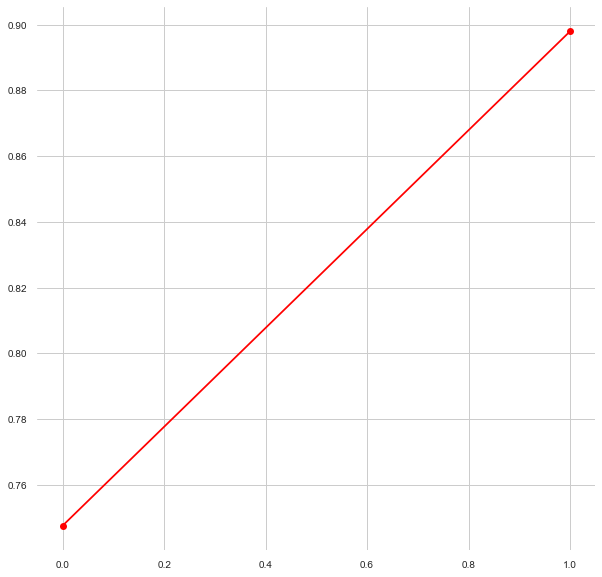

In [34]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [41]:
principal_df = pd.DataFrame(data=principalComponents ,columns = ['principal component 1', 'principal component 2'])

<Figure size 576x396 with 0 Axes>

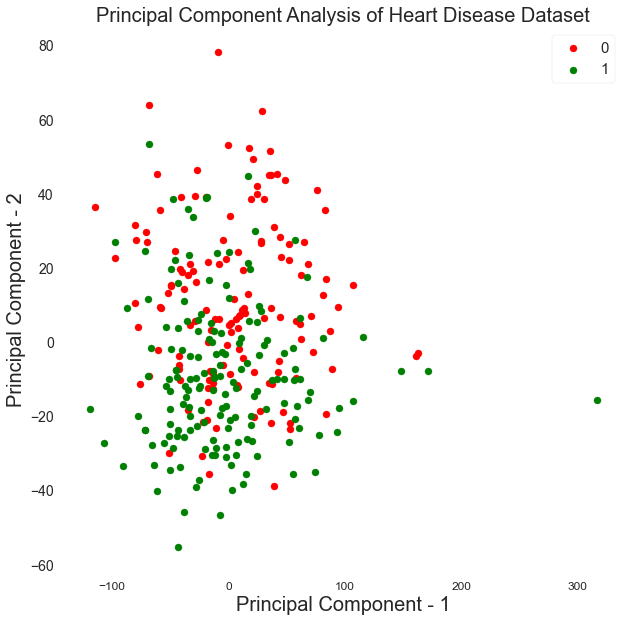

In [38]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Heart Disease Dataset",fontsize=20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['target'] == target
    plt.scatter(principal_df.loc[indicesToKeep, 'principal component 1']
               , principal_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [39]:
DATASET_FILEPATH = "../../dataset/uci_dataset_preprocess.csv"
df.to_csv(DATASET_FILEPATH, index=False)